# Plot example coarse behavioral labelling trace

Replicates example coarse behavior labelling trace for one recording day. Note that the figure from the data paper combined the targeted (targeted=True) and untargeted (both first_val=True and first_val=False) behavior labels.

In [ ]:
%pip install natsort
%pip install seaborn
%pip install nilearn
%pip install dandi
%pip install git+https://github.com/catalystneuro/brunton-lab-to-nwb.git


In [1]:
import natsort

from pynwb import NWBHDF5IO
from dandi.dandiapi import DandiAPIClient
from ndx_events import LabeledEvents, AnnotatedEventsTable, Events

from plot_utils import prune_clabels, plot_clabels


## Set parameters

In [2]:
targ_tlims = [13, 17]  # targeted window to plot (in hours)
targeted = False  # plot targeted window (True) or whole day (False)
first_val = True  # for targeted window, plot first activity label (True) or second (False)


## Load NWB data file

In [3]:
with DandiAPIClient() as client:
    asset = client.get_dandiset("000055", "draft").get_asset_by_path(
        "sub-01/sub-01_ses-4_behavior+ecephys.nwb"
    )
    s3_path = asset.get_content_url(follow_redirects=1, strip_query=True)

io = NWBHDF5IO(s3_path, mode='r', load_namespaces=True, driver='ros3')
nwb = io.read()
clabels_orig = nwb.intervals['epochs'].to_dataframe()


## Select coarse labels based on user parameters

In [4]:
clabels, uni_labs = prune_clabels(clabels_orig, targeted,
                                  first_val, targ_tlims)


## Plot labels over time

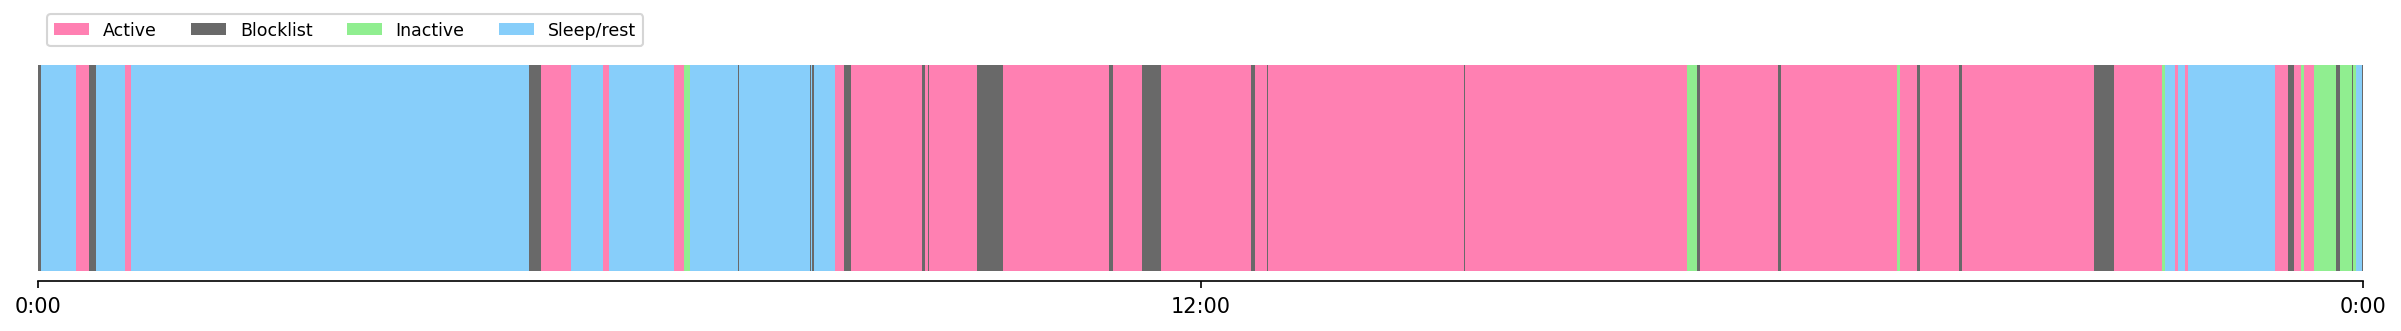

In [5]:
plot_clabels(clabels, uni_labs, targeted, first_val, targ_tlims)
